# Tutorial: Implementation with Scikit-learn

Setelah kita memahami intuisi dan cara memvisualisasikan Decision Tree, saatnya untuk mengimplementasikannya dalam alur kerja *machine learning* yang lengkap. Di notebook ini, kita akan menggunakan `DecisionTreeRegressor` dari Scikit-learn untuk melatih model, membuat prediksi, dan membandingkan performanya.

Kita akan melihat betapa mudahnya menggunakan model ini dengan API Scikit-learn yang konsisten (`.fit()`, `.predict()`).


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Mengimplementasikan alur kerja *end-to-end* untuk `DecisionTreeRegressor`.
* Melatih model pada data pelatihan dan membuat prediksi pada data pengujian.
* Memvisualisasikan hasil prediksi untuk mengevaluasi kecocokan model.
* Membandingkan secara langsung performa Decision Tree dengan Regresi Linear pada data non-linear.


---
### 2. Setup dan Data

Kita akan menggunakan kembali data non-linear (kuadratik) kita, karena ini adalah skenario di mana Decision Tree diharapkan berkinerja jauh lebih baik daripada Regresi Linear.


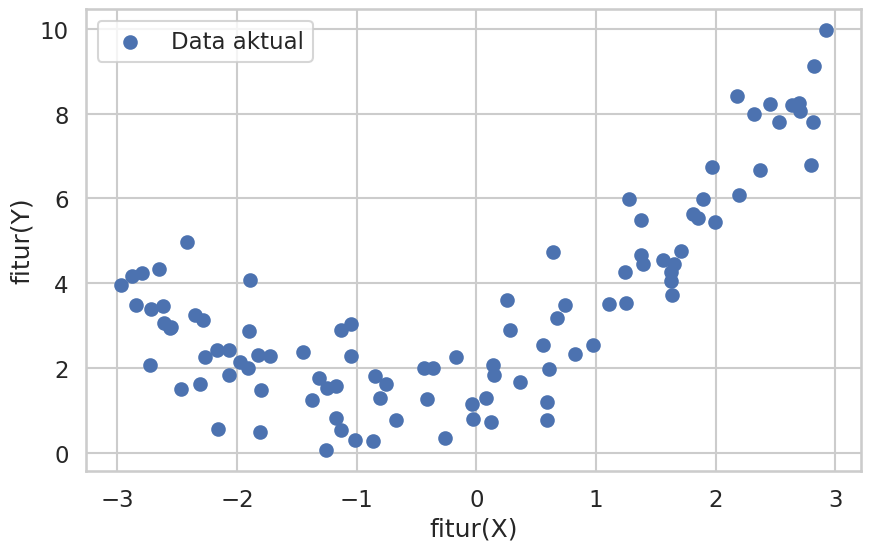

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Membuat data non-linear
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(10,6))
plt.scatter(X,Y,label="Data aktual")
plt.xlabel('fitur(X)')
plt.ylabel('fitur(Y)')
plt.legend()
plt.show()

### 3. Train-Test Split

Langkah pertama yang krusial sebelum pemodelan adalah memisahkan data kita.


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Ukuran data pelatihan: {X_train.shape[0]} sampel")
print(f"Ukuran data pengujian: {X_test.shape[0]} sampel")

Ukuran data pelatihan: 80 sampel
Ukuran data pengujian: 20 sampel


---
### 4. Melatih Model `DecisionTreeRegressor`

Sekarang, kita akan menginisiasi dan melatih model Decision Tree kita. Untuk saat ini, kita tidak akan membatasi kompleksitasnya (kita akan membiarkan parameter seperti `max_depth` menjadi default).


In [4]:
tree_reg = DecisionTreeRegressor(random_state=42)

# latih model
tree_reg.fit(X_train, Y_train)
print("model berhasil dilatih")

model berhasil dilatih


### 5. Membuat Prediksi dan Visualisasi

Mari kita lihat seberapa baik model kita yang sudah dilatih dapat menangkap pola dalam data.


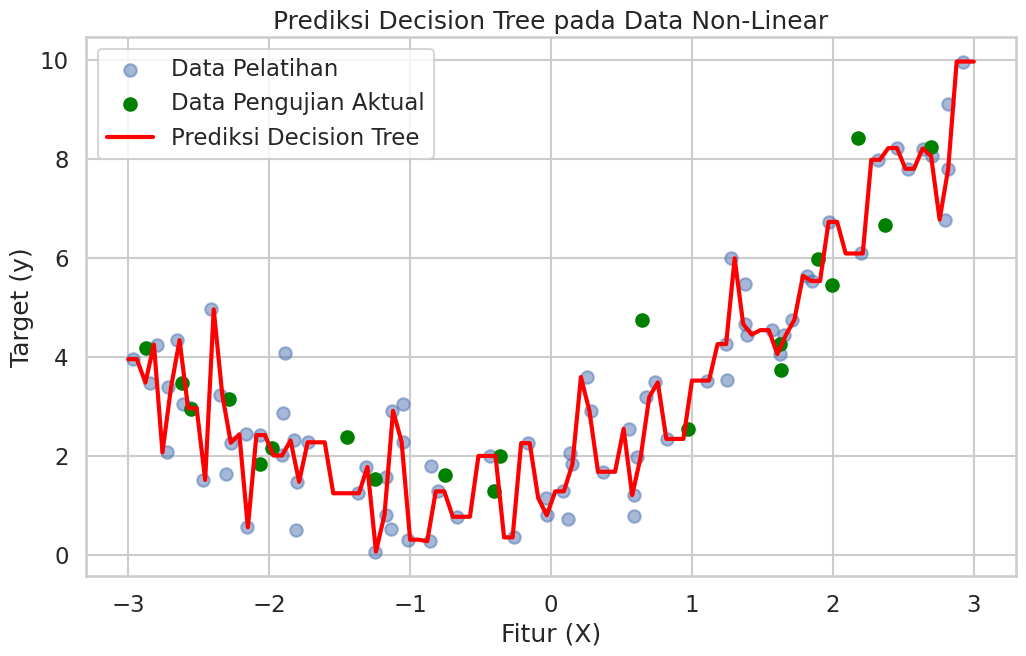

In [9]:
Y_pred_tree = tree_reg.predict(X_test)

# plot garis prediksi
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
Y_pred_line = tree_reg.predict(X_new)

# visualisasi
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train, alpha=0.5, label='Data Pelatihan')
plt.scatter(X_test, Y_test, color='green', label='Data Pengujian Aktual')
plt.plot(X_new, Y_pred_line, color='red', linewidth=3, label='Prediksi Decision Tree')

plt.title('Prediksi Decision Tree pada Data Non-Linear', fontsize=18)
plt.xlabel('Fitur (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

**Analisis:**

Garis prediksi merah menunjukkan bahwa Decision Tree sangat fleksibel. Ia berhasil menangkap pola kurva umum dari data dengan membuat serangkaian "langkah" atau segmen. Namun, perhatikan bahwa garisnya terlihat sedikit "bergerigi" dan tidak mulus. Ini adalah petunjuk awal bahwa modelnya mungkin sedikit **overfitting** terhadap data pelatihan.


---
### 6. Perbandingan dengan Regresi Linear

Untuk benar-benar menghargai kekuatan Decision Tree pada data non-linear, mari kita latih model Regresi Linear pada data yang sama dan bandingkan hasilnya.


In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_linear = lin_reg.predict(X_test)

# hitung score
re_tree = r2_score(Y_test, Y_pred_tree)
re_linear = r2_score(Y_test, Y_pred_linear)

print(f"r2 score Decision Tree Regressor: {re_tree:.4f}")
print(f"r2 score Linear Regression: {re_linear:.4f}")

r2 score Decision Tree Regressor: 0.7933
r2 score Linear Regression: 0.4297


**Analisis Kuantitatif:**

Hasilnya sangat jelas. Model Decision Tree (R² ≈ 0.7933) jauh lebih baik dalam menjelaskan variasi data dibandingkan model Regresi Linear (R² ≈ 0.4297) pada masalah non-linear ini.

Mari kita visualisasikan perbedaannya.


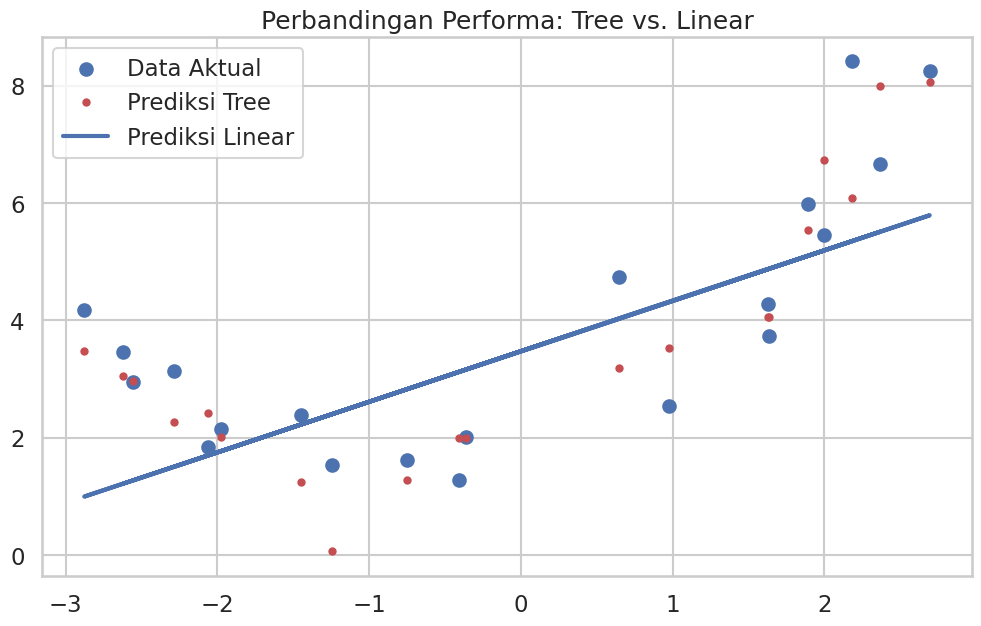

In [11]:
plt.figure(figsize=(12, 7))
plt.scatter(X_test, Y_test, label='Data Aktual')
plt.plot(X_test, Y_pred_tree, "r.", markersize=10, label="Prediksi Tree")
plt.plot(X_test, Y_pred_linear, "b-", linewidth=3, label="Prediksi Linear")
plt.title("Perbandingan Performa: Tree vs. Linear", fontsize=18)
plt.legend()
plt.show()

### Kesimpulan

* `DecisionTreeRegressor` sangat mudah diimplementasikan menggunakan API Scikit-learn yang konsisten.
* Ia secara alami mampu menangani hubungan **non-linear** dalam data, sesuatu yang tidak bisa dilakukan oleh Regresi Linear biasa.
* Meskipun kuat, fleksibilitasnya yang tinggi juga membuatnya rentan terhadap **overfitting**.

**Selanjutnya:**
Sekarang kita tahu betapa kuatnya Decision Tree, kita juga harus belajar tentang kelemahan terbesarnya. Di subchapter berikutnya, kita akan menyelami lebih dalam mengapa dan bagaimana Decision Tree bisa **overfitting**.